# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [7]:
nomes = pd.concat(frames)['nome'].to_frame()

In [8]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


# **Incluindo o ID dos alunos**

In [9]:
import numpy as np

In [10]:
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

400

In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [13]:
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [14]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)


In [15]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


# **Criando a tabela Cursos**

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [19]:
import html5lib

In [20]:
url = "https://tabela-cursos.herokuapp.com/index.html"

In [21]:
cursos = pd.read_html(url)

In [22]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [23]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [24]:
cursos = cursos[0]

### 'cursos = cursos[0]' retornou um dataFrame pois O read_html funciona assim para o caso de encontrar mais de uma tabela, então ele sempre retorna uma lista que pode ter um ou mais DataFrames dependendo do número de tabelas encontradas.

In [25]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# **Alterando o index de cursos**

In [26]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [27]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [28]:
cursos['id'] = cursos.index + 1

In [29]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [30]:
#utilizando o id como index do dataframe
cursos = cursos.set_index('id')

In [31]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# **Matriculando os alunos nos cursos**

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


In [33]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [34]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,1


In [35]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [36]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


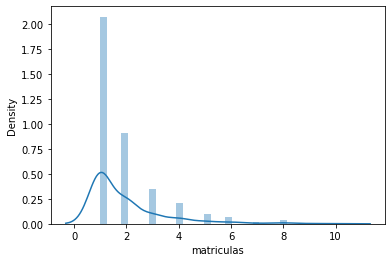

In [37]:
sns.distplot(nomes.matriculas)

In [38]:
nomes.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

# **Selecionando cursos**

In [39]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@servicodoemail.com,caua@servicodoemail.com,2
36,DEBORA,338,@dominiodoemail.com.br,debora@dominiodoemail.com.br,1
135,ROSILENE,387,@servicodoemail.com,rosilene@servicodoemail.com,2


In [40]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [41]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [42]:
matriculas

,id_aluno,id_curso
0,235,13
1,43,4
2,43,4
3,43,4
4,43,10
...,...,...
763,231,15
764,99,12
765,323,10
766,383,13


In [43]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web
4,89,Ruby on Rails
5,10,Cursos de Python
6,26,PHP com MySql
7,5,.NET para web
8,9,Novas integrações com Java
9,12,TDD com Java


In [44]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [45]:
matriculas_por_curso.head()


,quantidade_de_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web
4,89,Ruby on Rails
5,10,Cursos de Python


# Saída em Diferentes formatos

In [46]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web


In [47]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [48]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,51,Lógica de programação
1,30,Java para Web
2,63,C# para Web
3,89,Ruby on Rails
4,10,Cursos de Python
5,26,PHP com MySql
6,5,.NET para web
7,9,Novas integrações com Java
8,12,TDD com Java
9,42,Código limpo com C#


In [49]:
matriculas_json = matriculas_por_curso.to_json()

In [50]:
matriculas_json

'{"quantidade_de_alunos":{"1":51,"2":30,"3":63,"4":89,"5":10,"6":26,"7":5,"8":9,"9":12,"10":42,"11":75,"12":24,"13":48,"14":63,"15":65,"16":4,"17":32,"18":17,"19":25,"20":78},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [51]:
matriculas_html = matriculas_por_curso.to_html()

In [52]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>51</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>30</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>63</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>89</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>10</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>26</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>5</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>9</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>12</td>
  

#Criando o banco SQL

In [53]:
!pip install sqlalchemy

In [54]:
from sqlalchemy import create_engine, MetaData, Table

In [55]:
engine = create_engine('sqlite:///:memory:')

In [56]:
engine

Engine(sqlite:///:memory:)

In [57]:
type(engine)

sqlalchemy.engine.base.Engine

In [58]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web


In [59]:
matriculas_por_curso.to_sql('matriculas', engine)

In [60]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco sql

In [61]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [62]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,10,Cursos de Python
1,7,5,.NET para web
2,8,9,Novas integrações com Java
3,9,12,TDD com Java
4,16,4,Estatística básica
5,18,17,Programação funcional


In [63]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [64]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

# Escrevendo no Banco

In [65]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [66]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.
